**Import bibliotek**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Załadowanie pliku CSV**

In [2]:
df = pd.read_csv("smmh.csv")

**Zmiana liczby wyświetlanych kolumn** - dla wykorzytanych danych, domyślnie ukrywana jest jedna kolumna

In [3]:
pd.set_option('display.max_columns', None)

**Dane przed obróbką**

In [4]:
df

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4


**Oryginalne nazwy kolumn**

In [5]:
for column in df.columns:
        print(column)

Timestamp
1. What is your age?
2. Gender
3. Relationship Status
4. Occupation Status
5. What type of organizations are you affiliated with?
6. Do you use social media?
7. What social media platforms do you commonly use?
8. What is the average time you spend on social media every day?
9. How often do you find yourself using Social media without a specific purpose?
10. How often do you get distracted by Social media when you are busy doing something?
11. Do you feel restless if you haven't used Social media in a while?
12. On a scale of 1 to 5, how easily distracted are you?
13. On a scale of 1 to 5, how much are you bothered by worries?
14. Do you find it difficult to concentrate on things?
15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?
16. Following the previous question, how do you feel about these comparisons, generally speaking?
17. How often do you look to seek validation from features of social media?
18. How of

**Lista nowych nazw kolumn** - nazwy zostały skrócone i uproszczone, dzięki czemu późniejszy kod będzie czytelniejszy

In [6]:
new_column_names = [
    "timestamp", "age", "gender", "relationship_status", "occupation_status", 
    "affiliated_organizations", "sm_use_YN", "sm_platforms", "sm_avg_time", 
    "scale_sm_wo_purpose", "scale_sm_freq_distracted", "scale_sm_freq_restless", 
    "scale_distraction", "scale_bothered", "scale_difficult_to_concentrate", 
    "scale_compare_to_sm", "scale_attitude_sm_comparison", "scale_sm_freq_validation", 
    "scale_freq_depressed", "scale_freq_fluctate_interest", "scale_freq_sleep_issues"
]

**Przypisanie nowych nazw kolumn**

In [7]:
df.columns = new_column_names

In [8]:
for column in df.columns:
        print(column)

timestamp
age
gender
relationship_status
occupation_status
affiliated_organizations
sm_use_YN
sm_platforms
sm_avg_time
scale_sm_wo_purpose
scale_sm_freq_distracted
scale_sm_freq_restless
scale_distraction
scale_bothered
scale_difficult_to_concentrate
scale_compare_to_sm
scale_attitude_sm_comparison
scale_sm_freq_validation
scale_freq_depressed
scale_freq_fluctate_interest
scale_freq_sleep_issues


**Sprawdzenie brakujących wartości**

In [9]:
df.isnull().sum()

timestamp                          0
age                                0
gender                             0
relationship_status                0
occupation_status                  0
affiliated_organizations          30
sm_use_YN                          0
sm_platforms                       0
sm_avg_time                        0
scale_sm_wo_purpose                0
scale_sm_freq_distracted           0
scale_sm_freq_restless             0
scale_distraction                  0
scale_bothered                     0
scale_difficult_to_concentrate     0
scale_compare_to_sm                0
scale_attitude_sm_comparison       0
scale_sm_freq_validation           0
scale_freq_depressed               0
scale_freq_fluctate_interest       0
scale_freq_sleep_issues            0
dtype: int64

In [10]:
print(df["affiliated_organizations"].unique())

['University' 'Private' nan 'School, University' 'Company'
 'School, Private' 'University, Company' 'Goverment' 'Company, Private'
 'School' 'University, Goverment, Private' 'University, Company, Private'
 'University, Private' 'University, N/A' 'School, University, Private'
 'University, Goverment' 'University, Company, Goverment'
 'School, Company' 'School, N/A']


In [11]:
df[df["affiliated_organizations"].isnull()]

,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,sm_use_YN,sm_platforms,sm_avg_time,scale_sm_wo_purpose,scale_sm_freq_distracted,scale_sm_freq_restless,scale_distraction,scale_bothered,scale_difficult_to_concentrate,scale_compare_to_sm,scale_attitude_sm_comparison,scale_sm_freq_validation,scale_freq_depressed,scale_freq_fluctate_interest,scale_freq_sleep_issues
17,4/18/2022 20:21:09,25.0,Male,Single,School Student,NaN,Yes,"Facebook, Instagram, YouTube, Reddit",Between 4 and 5 hours,5,5,4,4,3,3,1,4,2,2,2,2
24,4/18/2022 20:36:42,23.0,Male,Single,University Student,NaN,Yes,"Facebook, Twitter, YouTube, Discord",Between 3 and 4 hours,3,3,5,5,5,5,4,1,3,3,5,5
42,4/18/2022 21:48:07,56.0,Female,Married,Retired,NaN,Yes,YouTube,Between 1 and 2 hours,1,1,1,1,3,1,1,3,1,2,3,1
47,4/18/2022 22:00:21,17.0,Female,Single,School Student,NaN,Yes,"Instagram, YouTube, Reddit, Pinterest",Between 3 and 4 hours,4,3,1,3,5,3,4,2,1,3,5,1
63,4/18/2022 23:19:30,25.0,Male,Single,Salaried Worker,NaN,Yes,Reddit,Between 1 and 2 hours,3,1,1,3,2,4,1,3,1,5,1,5
64,4/18/2022 23:23:52,19.0,Female,Single,University Student,NaN,Yes,"Discord, Reddit",Between 2 and 3 hours,2,3,1,5,3,5,1,3,1,1,5,4
74,4/19/2022 1:16:34,23.0,Female,Single,Retired,NaN,Yes,"Facebook, YouTube, Discord, Reddit",Between 4 and 5 hours,4,4,3,3,4,5,3,2,4,5,5,4
80,4/19/2022 2:58:24,22.0,Male,Single,University Student,NaN,Yes,"Twitter, Instagram, YouTube, Snapchat, Discord...",Between 2 and 3 hours,4,4,4,5,5,5,3,3,1,4,4,5
85,4/19/2022 7:10:09,24.0,NB,Single,Salaried Worker,NaN,Yes,"YouTube, Reddit",Between 2 and 3 hours,4,3,2,3,5,2,3,2,2,4,3,1
97,4/19/2022 14:08:55,20.0,Male,Single,School Student,NaN,Yes,"YouTube, Reddit",More than 5 hours,4,2,1,2,1,1,2,2,1,4,3,2


In [12]:
df["affiliated_organizations"].fillna("N/A", inplace=True)

**Zmiana typu danych**

In [13]:
print(df.dtypes)

timestamp                          object
age                               float64
gender                             object
relationship_status                object
occupation_status                  object
affiliated_organizations           object
sm_use_YN                          object
sm_platforms                       object
sm_avg_time                        object
scale_sm_wo_purpose                 int64
scale_sm_freq_distracted            int64
scale_sm_freq_restless              int64
scale_distraction                   int64
scale_bothered                      int64
scale_difficult_to_concentrate      int64
scale_compare_to_sm                 int64
scale_attitude_sm_comparison        int64
scale_sm_freq_validation            int64
scale_freq_depressed                int64
scale_freq_fluctate_interest        int64
scale_freq_sleep_issues             int64
dtype: object


In [14]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [16]:
df["age"].unique()

array([21. , 22. , 20. , 24. , 23. , 25. , 28. , 34. , 26. , 35. , 18. ,
       19. , 56. , 65. , 17. , 40. , 33. , 55. , 27. , 14. , 38. , 32. ,
       30. , 16. , 48. , 47. , 50. , 49. , 51. , 46. , 36. , 37. , 45. ,
       42. , 31. , 69. , 91. , 15. , 29. , 43. , 26.7, 52. , 44. , 60. ,
       13. , 53. ])

In [17]:
df["age"] = pd.to_numeric(df["age"]).round().astype("Int64")

In [18]:
print(df["gender"].unique())

['Male' 'Female' 'Nonbinary ' 'Non-binary' 'NB' 'unsure ' 'Trans'
 'Non binary ' 'There are others???']


In [19]:
print(df["relationship_status"].unique())

['In a relationship' 'Single' 'Married' 'Divorced']


In [20]:
print(df["occupation_status"].unique())

['University Student' 'School Student' 'Salaried Worker' 'Retired']


In [21]:
print(df["affiliated_organizations"].unique())

['University' 'Private' 'N/A' 'School, University' 'Company'
 'School, Private' 'University, Company' 'Goverment' 'Company, Private'
 'School' 'University, Goverment, Private' 'University, Company, Private'
 'University, Private' 'University, N/A' 'School, University, Private'
 'University, Goverment' 'University, Company, Goverment'
 'School, Company' 'School, N/A']


In [22]:
df["affiliated_organizations"] = df["affiliated_organizations"].apply(
    lambda x: [org.strip() for org in x.split(',')]
)

In [23]:
print(df["sm_use_YN"].unique())

['Yes' 'No']


In [24]:
print(df["sm_platforms"].unique())

['Facebook, Twitter, Instagram, YouTube, Discord, Reddit'
 'Facebook, Instagram, YouTube, Pinterest' 'Facebook, Instagram'
 'Facebook, Instagram, YouTube'
 'Facebook, Twitter, Instagram, YouTube, Discord, Pinterest, TikTok'
 'Facebook, Instagram, YouTube, Snapchat, TikTok' 'Reddit, Pinterest'
 'Facebook, Instagram, YouTube, Discord'
 'Facebook, Instagram, YouTube, Snapchat, Discord, Reddit, Pinterest, TikTok'
 'Facebook, Twitter, Instagram, YouTube, Snapchat, Discord, Reddit, Pinterest'
 'Facebook, Twitter, Instagram, YouTube, Snapchat, Reddit, Pinterest'
 'Facebook, YouTube, Pinterest' 'Facebook, Instagram, YouTube, Reddit'
 'Facebook, YouTube, Discord' 'Facebook, YouTube, Discord, Reddit'
 'Facebook, Twitter, Instagram, YouTube'
 'Facebook, Instagram, YouTube, Discord, Reddit'
 'Facebook, Twitter, Instagram, YouTube, Discord, Reddit, TikTok'
 'Facebook, Instagram, YouTube, Snapchat, Pinterest'
 'Facebook, Twitter, YouTube, Discord' 'Facebook, YouTube'
 'Facebook, Instagram, YouTube, 

In [25]:
df["sm_platforms"] = df["sm_platforms"].apply(
    lambda x: [platform.strip() for platform in x.split(',')]
)

In [26]:
print(df["sm_avg_time"].unique())

['Between 2 and 3 hours' 'More than 5 hours' 'Between 3 and 4 hours'
 'Less than an Hour' 'Between 1 and 2 hours' 'Between 4 and 5 hours']


In [27]:
time_mapping_num = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 5.5
}

In [28]:
df["sm_avg_time_num"] = df["sm_avg_time"].map(time_mapping_num)

In [29]:
sorted(df["sm_avg_time_num"].unique())

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

Dane po wstępnych zmianach nazw i typów kolumn

In [30]:
df.head()

,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,sm_use_YN,sm_platforms,sm_avg_time,scale_sm_wo_purpose,scale_sm_freq_distracted,scale_sm_freq_restless,scale_distraction,scale_bothered,scale_difficult_to_concentrate,scale_compare_to_sm,scale_attitude_sm_comparison,scale_sm_freq_validation,scale_freq_depressed,scale_freq_fluctate_interest,scale_freq_sleep_issues,sm_avg_time_num
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,[University],Yes,"[Facebook, Twitter, Instagram, YouTube, Discor...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5,2.5
1,2022-04-18 19:19:28,21,Female,Single,University Student,[University],Yes,"[Facebook, Twitter, Instagram, YouTube, Discor...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5,5.5
2,2022-04-18 19:25:59,21,Female,Single,University Student,[University],Yes,"[Facebook, Instagram, YouTube, Pinterest]",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5,3.5
3,2022-04-18 19:29:43,21,Female,Single,University Student,[University],Yes,"[Facebook, Instagram]",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2,5.5
4,2022-04-18 19:33:31,21,Female,Single,University Student,[University],Yes,"[Facebook, Instagram, YouTube]",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1,2.5


In [31]:
print(df.dtypes)

timestamp                         datetime64[ns]
age                                        Int64
gender                                    object
relationship_status                       object
occupation_status                         object
affiliated_organizations                  object
sm_use_YN                                 object
sm_platforms                              object
sm_avg_time                               object
scale_sm_wo_purpose                        int64
scale_sm_freq_distracted                   int64
scale_sm_freq_restless                     int64
scale_distraction                          int64
scale_bothered                             int64
scale_difficult_to_concentrate             int64
scale_compare_to_sm                        int64
scale_attitude_sm_comparison               int64
scale_sm_freq_validation                   int64
scale_freq_depressed                       int64
scale_freq_fluctate_interest               int64
scale_freq_sleep_iss

**Dodanie nowych kolumn**

In [32]:
affiliated_organizations_count = df["affiliated_organizations"].apply(len)
df.insert(loc=6, column="affiliated_organizations_count", value=affiliated_organizations_count)

In [33]:
sm_platforms_count = df["sm_platforms"].apply(len)
df.insert(loc=9, column="sm_platforms_count", value=sm_platforms_count)

**Dodanie kolumny z ID**

In [34]:
tech_ID = range(1, len(df) + 1)

In [35]:
df.insert(loc=0, column="tech_ID", value=tech_ID)

In [36]:
df

,tech_ID,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,affiliated_organizations_count,sm_use_YN,sm_platforms,sm_platforms_count,sm_avg_time,scale_sm_wo_purpose,scale_sm_freq_distracted,scale_sm_freq_restless,scale_distraction,scale_bothered,scale_difficult_to_concentrate,scale_compare_to_sm,scale_attitude_sm_comparison,scale_sm_freq_validation,scale_freq_depressed,scale_freq_fluctate_interest,scale_freq_sleep_issues,sm_avg_time_num
0,1,2022-04-18 19:18:47,21,Male,In a relationship,University Student,[University],1,Yes,"[Facebook, Twitter, Instagram, YouTube, Discor...",6,Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5,2.5
1,2,2022-04-18 19:19:28,21,Female,Single,University Student,[University],1,Yes,"[Facebook, Twitter, Instagram, YouTube, Discor...",6,More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5,5.5
2,3,2022-04-18 19:25:59,21,Female,Single,University Student,[University],1,Yes,"[Facebook, Instagram, YouTube, Pinterest]",4,Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5,3.5
3,4,2022-04-18 19:29:43,21,Female,Single,University Student,[University],1,Yes,"[Facebook, Instagram]",2,More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2,5.5
4,5,2022-04-18 19:33:31,21,Female,Single,University Student,[University],1,Yes,"[Facebook, Instagram, YouTube]",3,Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,477,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"[University, Private]",2,Yes,"[Facebook, Instagram, YouTube]",3,Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4,2.5
477,478,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,[University],1,Yes,"[Facebook, YouTube]",2,Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1,1.5
478,479,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,[University],1,Yes,"[Facebook, YouTube]",2,Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2,2.5
479,480,2022-07-14 19:33:47,21,Male,Single,University Student,[University],1,Yes,"[Facebook, Twitter, Instagram, YouTube, Discor...",6,Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4,2.5


In [37]:
df.to_csv('dane_dashboard.csv', index=False, encoding='utf-8')

**Ogólne informacje o uczestnikach badania**

In [15]:
min_timestamp = df["timestamp"].min().date() 
max_timestamp = df["timestamp"].max().date() 
print(f"Minimalna data: {min_timestamp}")
print(f"Maksymalna data: {max_timestamp}")

Minimalna data: 2022-04-18
Maksymalna data: 2022-11-12


In [38]:
min_age = df["age"].min()
max_age = df["age"].max()
print(f"Minimalny wiek: {min_age}")
print(f"Maksymalny wiek: {max_age}")

Minimalny wiek: 13
Maksymalny wiek: 91


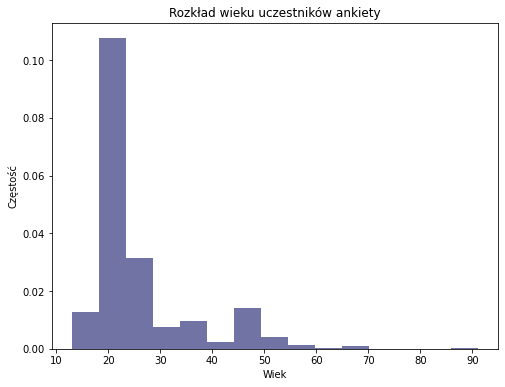

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df["age"], bins=15, stat="density", linewidth=0, color=plt.cm.viridis(0.2))
plt.title("Rozkład wieku uczestników ankiety")
plt.xlabel("Wiek")
plt.ylabel("Częstość")
plt.show()

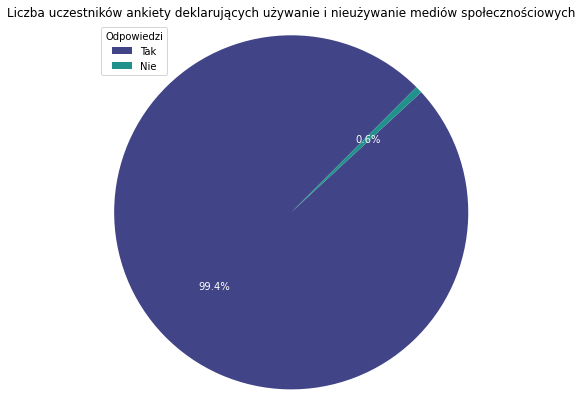

In [40]:
social_media_usage = df["sm_use_YN"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(social_media_usage, labels=['Tak', 'Nie'], autopct='%1.1f%%', startangle=45, colors = plt.cm.viridis([0.2, 0.5]), textprops={'color':"w"})
plt.title("Liczba uczestników ankiety deklarujących używanie i nieużywanie mediów społecznościowych")
plt.legend(['Tak', 'Nie'], title="Odpowiedzi", loc="upper left")
plt.axis('equal')
plt.show()

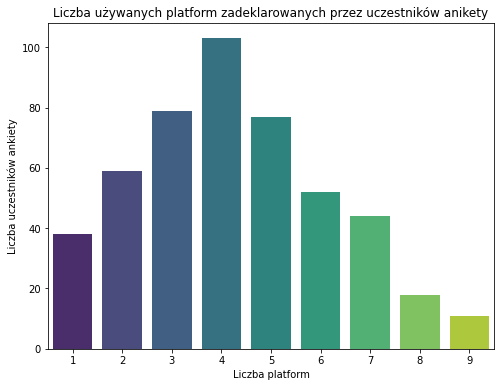

In [41]:
platform_counts = df["sm_platforms_count"].value_counts().reset_index()
platform_counts.columns = ["Liczba platform", "Liczba uczestników"]

plt.figure(figsize=(8, 6))
sns.barplot(data=platform_counts, x="Liczba platform", y="Liczba uczestników", palette="viridis")
plt.title("Liczba używanych platform zadeklarowanych przez uczestników anikety")
plt.xlabel("Liczba platform")
plt.ylabel("Liczba uczestników ankiety")
plt.show()

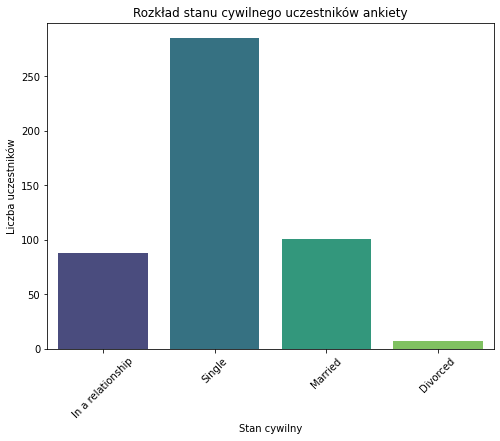

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="relationship_status", palette='viridis')
plt.title("Rozkład stanu cywilnego uczestników ankiety")
plt.xlabel("Stan cywilny")
plt.ylabel("Liczba uczestników")
plt.xticks(rotation=45)
plt.show()

**Analiza danych**

In [43]:
df[["affiliated_organizations_count", "sm_platforms_count" ,"scale_sm_wo_purpose", "scale_sm_freq_distracted", "scale_sm_freq_restless", 
          "scale_distraction", "scale_bothered", "scale_difficult_to_concentrate", 
          "scale_compare_to_sm", "scale_attitude_sm_comparison", "scale_sm_freq_validation", 
          "scale_freq_depressed", "scale_freq_fluctate_interest", "scale_freq_sleep_issues"]].describe()

,affiliated_organizations_count,sm_platforms_count,scale_sm_wo_purpose,scale_sm_freq_distracted,scale_sm_freq_restless,scale_distraction,scale_bothered,scale_difficult_to_concentrate,scale_compare_to_sm,scale_attitude_sm_comparison,scale_sm_freq_validation,scale_freq_depressed,scale_freq_fluctate_interest,scale_freq_sleep_issues
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,1.172557,4.268191,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,0.434640,1.971887,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,1.000000,4.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,1.000000,6.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,3.000000,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [44]:
corr_matrix = df[["age", "affiliated_organizations_count", "sm_platforms_count","sm_avg_time_num", "scale_sm_wo_purpose", "scale_sm_freq_distracted", "scale_sm_freq_restless", 
                  "scale_distraction", "scale_bothered", "scale_difficult_to_concentrate", 
                  "scale_compare_to_sm", "scale_attitude_sm_comparison", "scale_sm_freq_validation", 
                  "scale_freq_depressed", "scale_freq_fluctate_interest", "scale_freq_sleep_issues"]].corr()

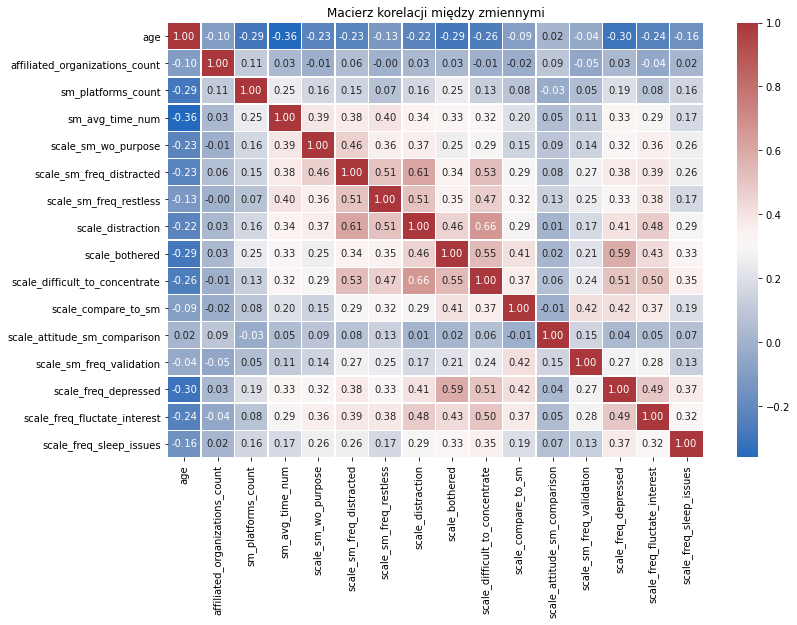

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), fmt=".2f", linewidths=0.3)
plt.title("Macierz korelacji między zmiennymi")
plt.show()

In [46]:
df_sorted = df.sort_values(by="sm_avg_time_num")

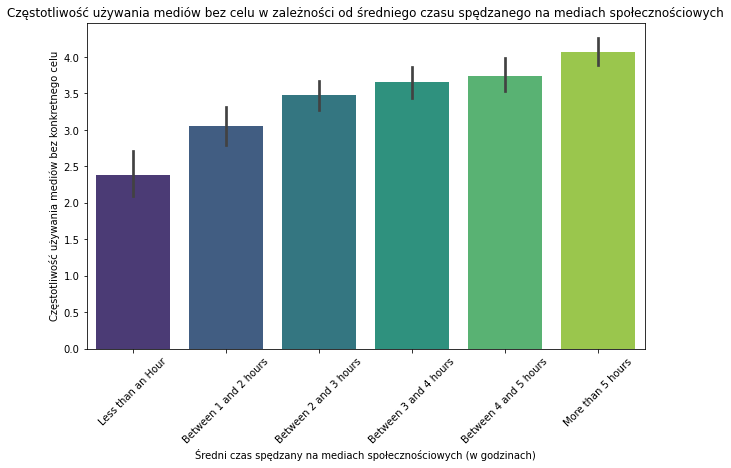

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x="sm_avg_time", y="scale_sm_wo_purpose", data=df_sorted, palette='viridis')
plt.title("Częstotliwość używania mediów bez celu w zależności od średniego czasu spędzanego na mediach społecznościowych")
plt.xlabel("Średni czas spędzany na mediach społecznościowych (w godzinach)")
plt.ylabel("Częstotliwość używania mediów bez konkretnego celu")
plt.xticks(rotation=45)
plt.show()

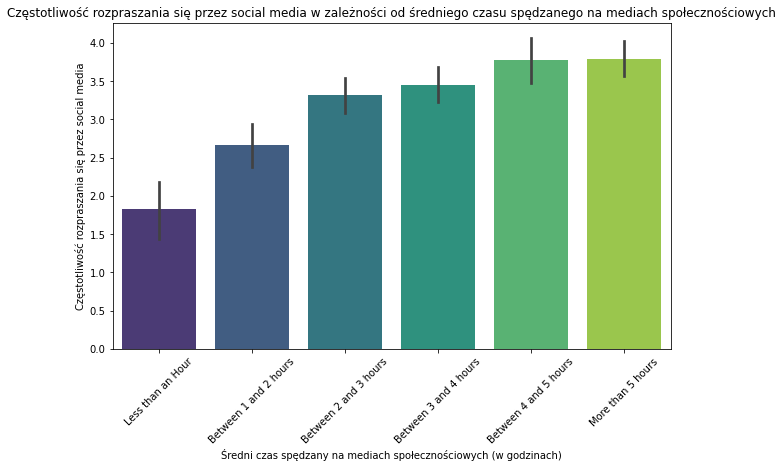

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x="sm_avg_time", y="scale_sm_freq_distracted", data=df_sorted, palette='viridis')
plt.title("Częstotliwość rozpraszania się przez social media w zależności od średniego czasu spędzanego na mediach społecznościowych")
plt.xlabel("Średni czas spędzany na mediach społecznościowych (w godzinach)")
plt.ylabel("Częstotliwość rozpraszania się przez social media")
plt.xticks(rotation=45)
plt.show()


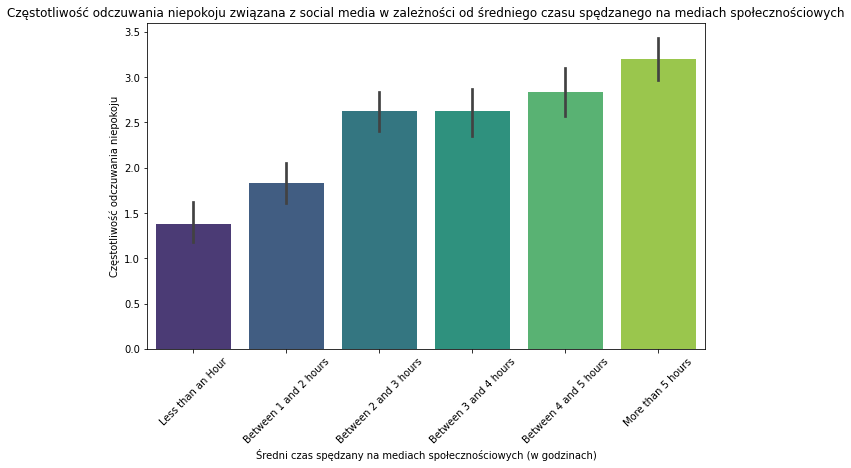

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x="sm_avg_time", y="scale_sm_freq_restless", data=df_sorted, palette='viridis')
plt.title("Częstotliwość odczuwania niepokoju związana z social media w zależności od średniego czasu spędzanego na mediach społecznościowych")
plt.xlabel("Średni czas spędzany na mediach społecznościowych (w godzinach)")
plt.ylabel("Częstotliwość odczuwania niepokoju")
plt.xticks(rotation=45)
plt.show()

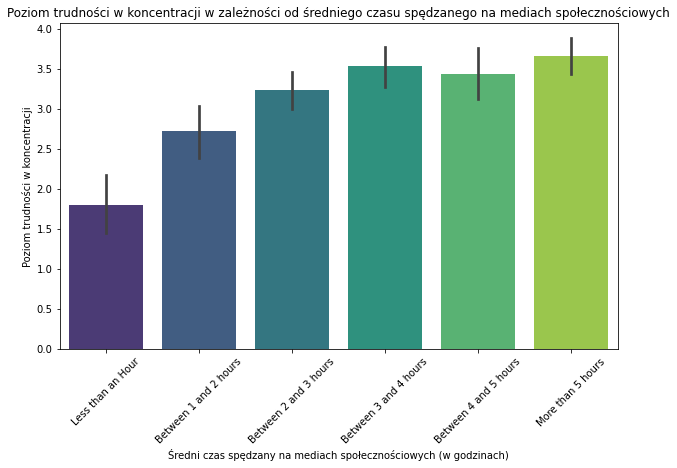

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x="sm_avg_time", y="scale_difficult_to_concentrate", data=df_sorted, palette='viridis')
plt.title("Poziom trudności w koncentracji w zależności od średniego czasu spędzanego na mediach społecznościowych")
plt.xlabel("Średni czas spędzany na mediach społecznościowych (w godzinach)")
plt.ylabel("Poziom trudności w koncentracji")
plt.xticks(rotation=45)
plt.show()

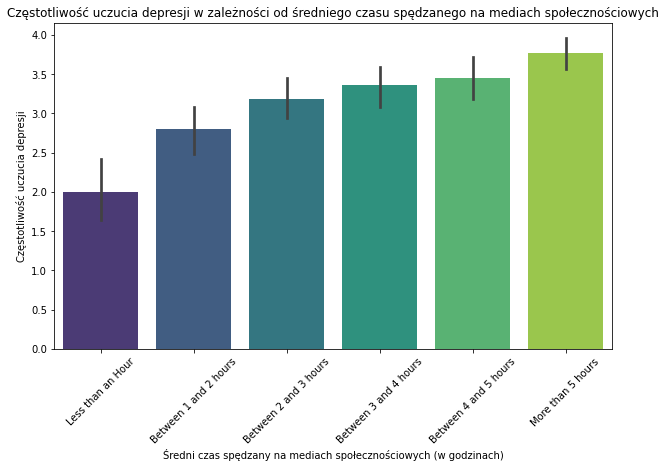

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x="sm_avg_time", y="scale_freq_depressed", data=df_sorted, palette='viridis')
plt.title("Częstotliwość uczucia depresji w zależności od średniego czasu spędzanego na mediach społecznościowych")
plt.xlabel("Średni czas spędzany na mediach społecznościowych (w godzinach)")
plt.ylabel("Częstotliwość uczucia depresji")
plt.xticks(rotation=45)
plt.show()

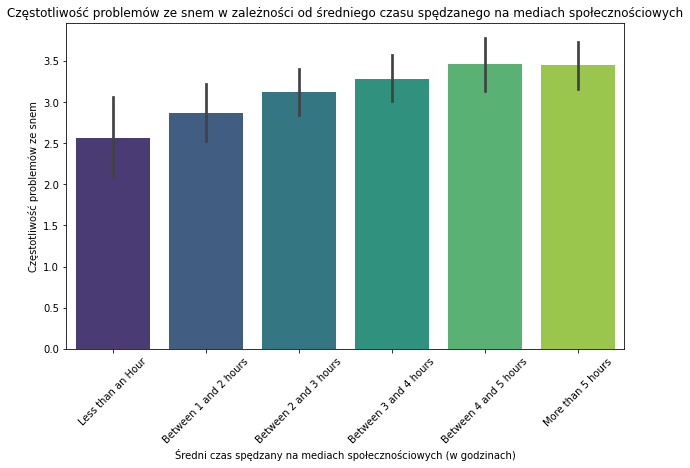

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x="sm_avg_time", y="scale_freq_sleep_issues", data=df_sorted, palette='viridis')
plt.title("Częstotliwość problemów ze snem w zależności od średniego czasu spędzanego na mediach społecznościowych")
plt.xlabel("Średni czas spędzany na mediach społecznościowych (w godzinach)")
plt.ylabel("Częstotliwość problemów ze snem")
plt.xticks(rotation=45)
plt.show()

**Analiza skrajnych przypadków**

In [53]:
no_sm_users = df[df["sm_use_YN"] == "No"]

In [54]:
no_sm_users

,tech_ID,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,affiliated_organizations_count,sm_use_YN,sm_platforms,sm_platforms_count,sm_avg_time,scale_sm_wo_purpose,scale_sm_freq_distracted,scale_sm_freq_restless,scale_distraction,scale_bothered,scale_difficult_to_concentrate,scale_compare_to_sm,scale_attitude_sm_comparison,scale_sm_freq_validation,scale_freq_depressed,scale_freq_fluctate_interest,scale_freq_sleep_issues,sm_avg_time_num
9,10,2022-04-18 19:41:34,20,Male,Single,University Student,[University],1,No,"[Reddit, Pinterest]",2,Less than an Hour,1,1,1,1,1,1,1,1,1,1,1,1,0.5
54,55,2022-04-18 22:35:53,26,Male,In a relationship,Salaried Worker,[Company],1,No,"[YouTube, Discord, Reddit]",3,Between 1 and 2 hours,4,1,1,2,2,1,1,3,1,1,3,2,1.5
134,135,2022-04-19 22:04:03,50,Male,Divorced,Salaried Worker,[Private],1,No,"[Instagram, YouTube]",2,Between 1 and 2 hours,2,1,1,2,2,2,1,4,1,2,2,1,1.5


In [55]:
min_sm_platforms_count = df["sm_platforms_count"].min()
min_sm_avg_time = df["sm_avg_time_num"].min()

In [56]:
low_sm_users = df[(df["sm_platforms_count"] == min_sm_platforms_count) & (df["sm_avg_time_num"] == min_sm_avg_time)]

In [57]:
low_sm_users

,tech_ID,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,affiliated_organizations_count,sm_use_YN,sm_platforms,sm_platforms_count,sm_avg_time,scale_sm_wo_purpose,scale_sm_freq_distracted,scale_sm_freq_restless,scale_distraction,scale_bothered,scale_difficult_to_concentrate,scale_compare_to_sm,scale_attitude_sm_comparison,scale_sm_freq_validation,scale_freq_depressed,scale_freq_fluctate_interest,scale_freq_sleep_issues,sm_avg_time_num
52,53,2022-04-18 22:23:35,26,Male,Single,University Student,[University],1,Yes,[Facebook],1,Less than an Hour,3,5,3,5,5,5,5,5,5,5,5,5,0.5
75,76,2022-04-19 01:41:19,26,Male,Single,Salaried Worker,[Company],1,Yes,[Reddit],1,Less than an Hour,2,1,1,3,2,1,1,1,1,2,3,4,0.5
133,134,2022-04-19 21:57:38,38,Female,Married,Salaried Worker,[School],1,Yes,[Facebook],1,Less than an Hour,3,2,3,2,2,1,3,1,1,2,1,1,0.5
156,157,2022-04-20 00:24:10,47,Male,Married,Salaried Worker,[Company],1,Yes,[Twitter],1,Less than an Hour,1,1,2,5,3,4,2,3,1,2,4,4,0.5
403,404,2022-05-12 18:33:15,44,Male,Married,Salaried Worker,[Private],1,Yes,[Facebook],1,Less than an Hour,1,1,1,2,1,1,1,1,1,1,1,1,0.5
404,405,2022-05-12 18:36:06,44,Male,Married,Salaried Worker,[Private],1,Yes,[Facebook],1,Less than an Hour,1,1,1,1,1,1,1,1,1,1,1,1,0.5


In [58]:
max_sm_platforms_count = df["sm_platforms_count"].max()
max_sm_avg_time = df["sm_avg_time_num"].max()

In [59]:
heavy_sm_users = df[(df["sm_platforms_count"] == max_sm_platforms_count) & (df["sm_avg_time_num"] == max_sm_avg_time)]

In [60]:
heavy_sm_users

,tech_ID,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,affiliated_organizations_count,sm_use_YN,sm_platforms,sm_platforms_count,sm_avg_time,scale_sm_wo_purpose,scale_sm_freq_distracted,scale_sm_freq_restless,scale_distraction,scale_bothered,scale_difficult_to_concentrate,scale_compare_to_sm,scale_attitude_sm_comparison,scale_sm_freq_validation,scale_freq_depressed,scale_freq_fluctate_interest,scale_freq_sleep_issues,sm_avg_time_num
270,271,2022-05-11 20:39:58,19,Female,Single,School Student,[School],1,Yes,"[Facebook, Twitter, Instagram, YouTube, Snapch...",9,More than 5 hours,3,2,1,5,2,3,1,3,1,2,1,5,5.5


In [61]:
low_sm_users = low_sm_users.drop(columns=['timestamp', 'tech_ID'])
heavy_sm_users = heavy_sm_users.drop(columns=['timestamp', 'tech_ID'])

In [62]:
low_sm_users.describe()

,age,affiliated_organizations_count,sm_platforms_count,scale_sm_wo_purpose,scale_sm_freq_distracted,scale_sm_freq_restless,scale_distraction,scale_bothered,scale_difficult_to_concentrate,scale_compare_to_sm,scale_attitude_sm_comparison,scale_sm_freq_validation,scale_freq_depressed,scale_freq_fluctate_interest,scale_freq_sleep_issues,sm_avg_time_num
count,6.0,6.0,6.0,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.0
mean,37.5,1.0,1.0,1.833333,1.833333,1.833333,3.00000,2.333333,2.166667,2.166667,2.00000,1.666667,2.166667,2.500000,2.666667,0.5
std,9.3755,0.0,0.0,0.983192,1.602082,0.983192,1.67332,1.505545,1.834848,1.602082,1.67332,1.632993,1.471960,1.760682,1.861899,0.0
min,26.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.5
25%,29.0,1.0,1.0,1.000000,1.000000,1.000000,2.00000,1.250000,1.000000,1.000000,1.00000,1.000000,1.250000,1.000000,1.000000,0.5
50%,41.0,1.0,1.0,1.500000,1.000000,1.500000,2.50000,2.000000,1.000000,1.500000,1.00000,1.000000,2.000000,2.000000,2.500000,0.5
75%,44.0,1.0,1.0,2.750000,1.750000,2.750000,4.50000,2.750000,3.250000,2.750000,2.50000,1.000000,2.000000,3.750000,4.000000,0.5
max,47.0,1.0,1.0,3.000000,5.000000,3.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,0.5


In [70]:
columns_to_compare_0 = [
    "age", "sm_avg_time_num"
]

low_sm_means_0 = low_sm_users[columns_to_compare_0].mean()
heavy_sm_means_0 = heavy_sm_users[columns_to_compare_0].mean()

comparison_df_0 = pd.DataFrame({
    'Używają najmniej': low_sm_means_0,
    'Używają najwięcej': heavy_sm_means_0
})

full_column_names_pl_0 = {
    "age": "Średni wiek", 
    "sm_avg_time_num": "Średni czas spędzany w mediach społecznościowych (w godzinach)"
}

comparison_df_0.rename(index=full_column_names_pl_0, inplace=True)

comparison_df_0

,Używają najmniej,Używają najwięcej
Średni wiek,37.5,19.0
Średni czas spędzany w mediach społecznościowych (w godzinach),0.5,5.5


In [64]:
columns_to_compare = [
    "affiliated_organizations_count", "scale_sm_wo_purpose", "scale_sm_freq_distracted",
    "scale_sm_freq_restless", "scale_difficult_to_concentrate", "scale_compare_to_sm",
    "scale_attitude_sm_comparison", "scale_sm_freq_validation", "scale_freq_depressed",
    "scale_freq_fluctate_interest", "scale_freq_sleep_issues"
]

low_sm_means = low_sm_users[columns_to_compare].mean()
heavy_sm_means = heavy_sm_users[columns_to_compare].mean()

comparison_df = pd.DataFrame({
    'Używają najmniej': low_sm_means,
    'Używają najwięcej': heavy_sm_means
})

print(comparison_df)

                                Używają najmniej  Używają najwięcej
affiliated_organizations_count          1.000000                1.0
scale_sm_wo_purpose                     1.833333                3.0
scale_sm_freq_distracted                1.833333                2.0
scale_sm_freq_restless                  1.833333                1.0
scale_difficult_to_concentrate          2.166667                3.0
scale_compare_to_sm                     2.166667                1.0
scale_attitude_sm_comparison            2.000000                3.0
scale_sm_freq_validation                1.666667                1.0
scale_freq_depressed                    2.166667                2.0
scale_freq_fluctate_interest            2.500000                1.0
scale_freq_sleep_issues                 2.666667                5.0


In [65]:
full_column_names_pl = {
    "affiliated_organizations_count": "Z jakimi organizacjami jesteś związany?",
    "scale_sm_wo_purpose": "Jak często używasz mediów społecznościowych bez konkretnego celu?",
    "scale_sm_freq_distracted": "Jak często rozpraszasz się mediami społecznościowymi, gdy jesteś zajęty czymś?",
    "scale_sm_freq_restless": "Czy czujesz się niespokojny, jeśli nie używałeś mediów społecznościowych przez dłuższy czas?",
    "scale_difficult_to_concentrate": "Czy trudno ci się skupić na rzeczach?",
    "scale_compare_to_sm": "W skali od 1 do 5, jak często porównujesz się do innych odnoszących sukcesy osób za pomocą mediów społecznościowych?",
    "scale_attitude_sm_comparison": "Po poprzednim pytaniu, jak się czujesz w związku z tymi porównaniami?",
    "scale_sm_freq_validation": "Jak często szukasz potwierdzenia swojej wartości za pomocą mediów społecznościowych?",
    "scale_freq_depressed": "Jak często czujesz się przygnębiony lub smutny?",
    "scale_freq_fluctate_interest": "W skali od 1 do 5, jak często zmienia się twoje zainteresowanie codziennymi aktywnościami?",
    "scale_freq_sleep_issues": "W skali od 1 do 5, jak często masz problemy ze snem?"
}

comparison_df.rename(index=full_column_names_pl, inplace=True)

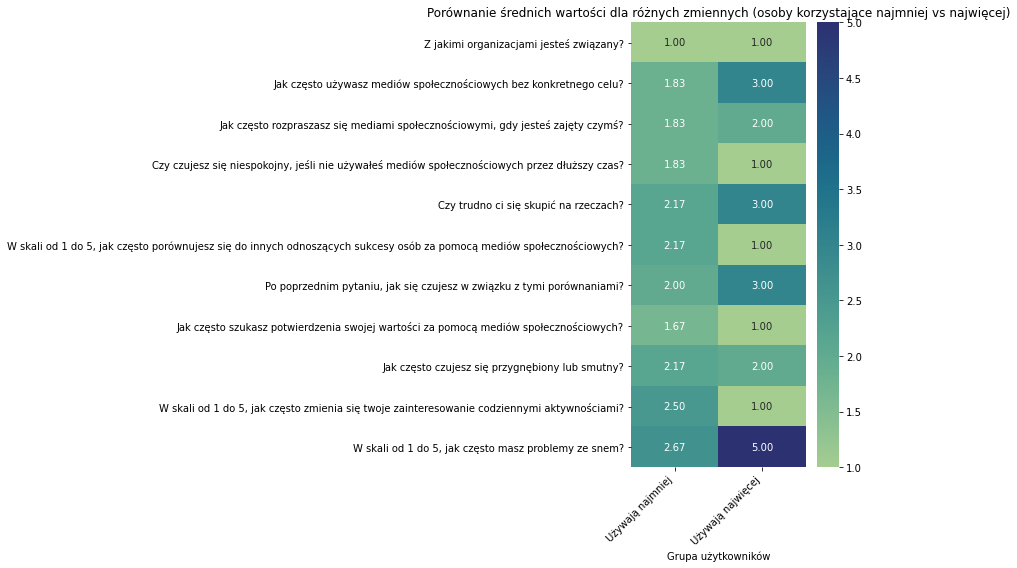

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df, annot=True, cmap="crest", fmt=".2f", cbar=True)
plt.title("Porównanie średnich wartości dla różnych zmiennych (osoby korzystające najmniej vs najwięcej)")
plt.xlabel("Grupa użytkowników")

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.tight_layout() 

plt.show()

In [67]:
columns_to_compare_md = [
    "affiliated_organizations_count", "scale_sm_wo_purpose", "scale_sm_freq_distracted",
    "scale_sm_freq_restless", "scale_difficult_to_concentrate", "scale_compare_to_sm",
    "scale_attitude_sm_comparison", "scale_sm_freq_validation", "scale_freq_depressed",
    "scale_freq_fluctate_interest", "scale_freq_sleep_issues"
]

low_sm_md = low_sm_users[columns_to_compare_md].median()
heavy_sm_md = heavy_sm_users[columns_to_compare_md].median()

comparison_df_md = pd.DataFrame({
    'Używają najmniej': low_sm_md,
    'Używają najwięcej': heavy_sm_md
})

print(comparison_df_md)

                                Używają najmniej  Używają najwięcej
affiliated_organizations_count               1.0                1.0
scale_sm_wo_purpose                          1.5                3.0
scale_sm_freq_distracted                     1.0                2.0
scale_sm_freq_restless                       1.5                1.0
scale_difficult_to_concentrate               1.0                3.0
scale_compare_to_sm                          1.5                1.0
scale_attitude_sm_comparison                 1.0                3.0
scale_sm_freq_validation                     1.0                1.0
scale_freq_depressed                         2.0                2.0
scale_freq_fluctate_interest                 2.0                1.0
scale_freq_sleep_issues                      2.5                5.0


In [68]:
comparison_df_md.rename(index=full_column_names_pl, inplace=True)

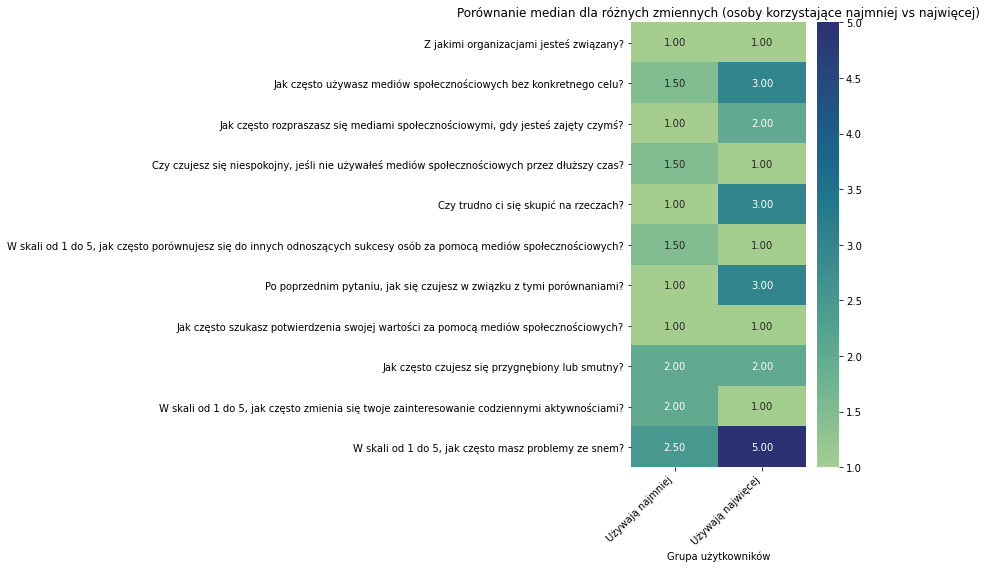

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df_md, annot=True, cmap="crest", fmt=".2f", cbar=True)
plt.title("Porównanie median dla różnych zmiennych (osoby korzystające najmniej vs najwięcej)")
plt.xlabel("Grupa użytkowników")

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.tight_layout() 

plt.show()